<Center> <h1> Wine Classification </Center> </h1>

### Loading wine dataset from sklearn

In [1]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_df = load_wine(as_frame=True)
X_df = wine_df.data
y_df = wine_df.target

### Sample records

In [2]:
print(X_df.shape)
X_df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Count of each unique label in the dataset

In [3]:
print(y_df.groupby(y_df).count())
y_df.head()

target
0    59
1    71
2    48
Name: target, dtype: int64


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Splitting into train and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_df, y_df, test_size=0.30,random_state=598)
print("Training features X_train:", X_train.shape)
print("Testing features X_test:", X_test.shape)
print("Training labels Y_train:", Y_train.shape)
print("Testing labels Y_test:", Y_test.shape)

print("Count of each label in training data:", Y_train.groupby(Y_train).count())
print("Count of each label in test data:", Y_test.groupby(Y_test).count())

Training features X_train: (124, 13)
Testing features X_test: (54, 13)
Training labels Y_train: (124,)
Testing labels Y_test: (54,)
Count of each label in training data: target
0    36
1    45
2    43
Name: target, dtype: int64
Count of each label in test data: target
0    23
1    26
2     5
Name: target, dtype: int64


### Fitting the training data using LDA, QDA and Multinomial (Logistic) regression for multiclass classification.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
qda = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
log_reg = make_pipeline(StandardScaler(),LogisticRegression(multi_class='multinomial'))

lda.fit(X_train,Y_train)
qda.fit(X_train,Y_train)
log_reg.fit(X_train,Y_train)

y_pred_train_lda= lda.predict(X_train)
y_pred_train_qda= qda.predict(X_train)
y_pred_train_log_reg= log_reg.predict(X_train)

y_pred_test_lda= lda.predict(X_test)
y_pred_test_qda= qda.predict(X_test)
y_pred_test_log_reg= log_reg.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Train and Test Accuracy of each of the models (LDA,QDA and Logistic regression)

In [10]:
lda_train_accuracy = accuracy_score(Y_train,y_pred_train_lda)
qda_train_accuracy = accuracy_score(Y_train,y_pred_train_qda)
log_reg_train_accuracy = accuracy_score(Y_train,y_pred_train_log_reg)

lda_test_accuracy = accuracy_score(Y_test,y_pred_test_lda)
qda_test_accuracy = accuracy_score(Y_test,y_pred_test_qda)
log_reg_test_accuracy = accuracy_score(Y_test,y_pred_test_log_reg)

print("LDA train accuracy:",lda_train_accuracy)
print("LDA test accuracy:",lda_test_accuracy)

print("QDA train accuracy:",qda_train_accuracy)
print("QDA test accuracy:",qda_test_accuracy)

print("Logistic regression train accuracy:",log_reg_train_accuracy)
print("Logistic regression test accuracy:",log_reg_test_accuracy)

LDA train accuracy: 1.0
LDA test accuracy: 0.9629629629629629
QDA train accuracy: 1.0
QDA test accuracy: 0.9814814814814815
Logistic regression train accuracy: 1.0
Logistic regression test accuracy: 0.9629629629629629


### Confusion matrix of all the models

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lda_train_confusion_matrix = confusion_matrix(Y_train,y_pred_train_lda)
lda_test_confusion_matrix = confusion_matrix(Y_test,y_pred_test_lda)

qda_train_confusion_matrix = confusion_matrix(Y_train,y_pred_train_qda)
qda_test_confusion_matrix = confusion_matrix(Y_test,y_pred_test_qda)


log_reg_train_confusion_matrix = confusion_matrix(Y_train,y_pred_train_log_reg)
log_reg_test_confusion_matrix = confusion_matrix(Y_test,y_pred_test_log_reg)

Text(0.5, 1.0, 'LDA confusion matrix (Test data prediction)')

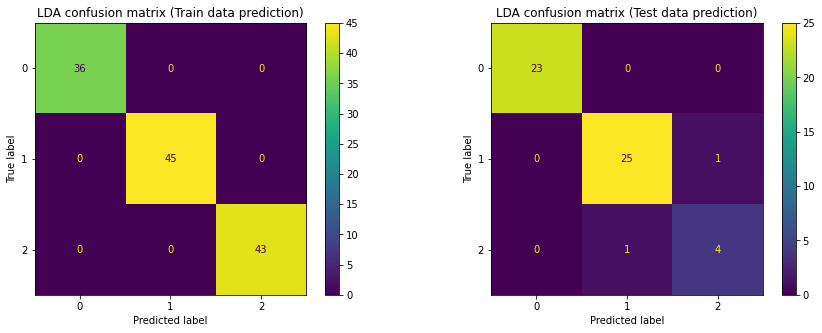

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2,figsize=(15,5))

disp_train_lda = ConfusionMatrixDisplay(confusion_matrix=lda_train_confusion_matrix, display_labels=lda.classes_)
disp_train_lda.plot(ax = axes[0])
axes[0].set_title("LDA confusion matrix (Train data prediction)")

disp_test_lda = ConfusionMatrixDisplay(confusion_matrix=lda_test_confusion_matrix, display_labels=lda.classes_)
disp_test_lda.plot(ax = axes[1])
axes[1].set_title("LDA confusion matrix (Test data prediction)")

Text(0.5, 1.0, 'QDA confusion matrix (Test data prediction)')

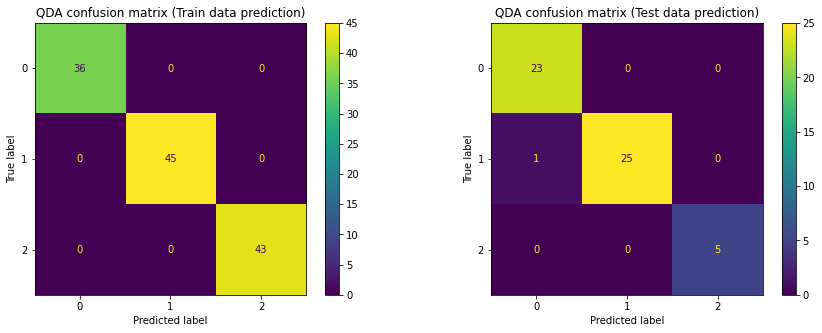

In [13]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))

disp_train_qda = ConfusionMatrixDisplay(confusion_matrix=qda_train_confusion_matrix, display_labels=qda.classes_)
disp_train_qda.plot(ax = axes[0])
axes[0].set_title("QDA confusion matrix (Train data prediction)")

disp_test_qda = ConfusionMatrixDisplay(confusion_matrix=qda_test_confusion_matrix, display_labels=qda.classes_)
disp_test_qda.plot(ax = axes[1])
axes[1].set_title("QDA confusion matrix (Test data prediction)")

Text(0.5, 1.0, 'Logistic regression confusion matrix(Test data prediction)')

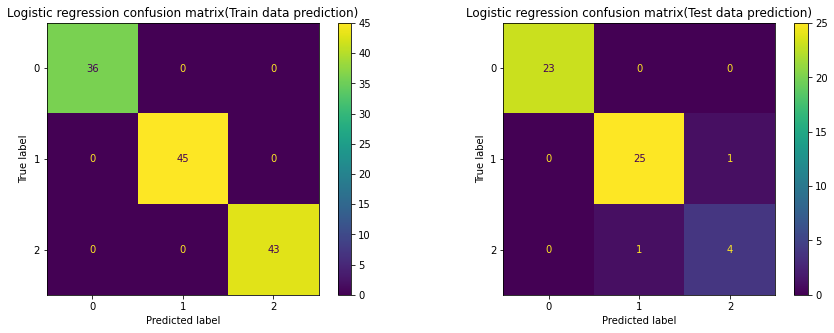

In [14]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))

disp_train_log_reg = ConfusionMatrixDisplay(confusion_matrix=log_reg_train_confusion_matrix, display_labels=log_reg.classes_)
disp_train_log_reg.plot(ax = axes[0])
axes[0].set_title("Logistic regression confusion matrix(Train data prediction)")

disp_test_log_reg = ConfusionMatrixDisplay(confusion_matrix=log_reg_test_confusion_matrix, display_labels=log_reg.classes_)
disp_test_log_reg.plot(ax = axes[1])
axes[1].set_title("Logistic regression confusion matrix(Test data prediction)")

#### Overall Model performance in classification

| Model               | Train Accuracy | Test Accuracy  |
| ------------------- | -------------- | -------------- |
| LDA                 | 100%           | ~96%           |
| QDA                 | 100%           | ~98%           |
| Logistic Regression | 100%           | ~96%           |

- We can see that all LDA, QDA and logistic regression had 100% prediction accuracy with training data, since the wine data was linearly separable.
- And all the three models performed well in predicting the class of test data with prediction accuracy more than 95% for all.
- Though all three models performed well, **Quadratic Discriminant Analysis(QDA) performed slightly better than LDA and Logistic regression in predicting the class of unseen test data**.

#### Confusion Matrix 
- LDA and Logistic Regression both misclassified 2 samples each(class 1 was predicted as 2 and class 2 was predicted as 1).
- QDA misclassified 1 sample (class 1 was predicted as class 0). 

#### Class Performance
- We can see that **all three models were able to classify Class 0 without any errors**.
- The QDA model, had one mislcassification error for class 1.
- The LDA and Logistic regression, had one misclassification in class 1 and class 2 each.
- Hence class 0 had 100% acccuracy in predition, in all three models.